In [65]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'result']
# load dataset
pima = pd.read_csv("D:\Documents\MachineLearning\pima-indians-diabetes.csv", header=None, names=col_names)
pima.head(10)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


0    500
1    268
Name: result, dtype: int64


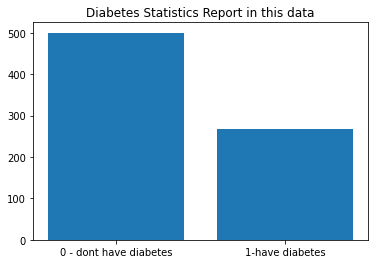

In [66]:
rst = pima['result'].value_counts()
print(rst)
#----------------------------------------------
#trực quan hóa kết quả
import matplotlib.pyplot as plt
plt.bar(['0 - dont have diabetes', '1-have diabetes'], rst.values)
plt.title('Diabetes Statistics Report in this data')
plt.show()

In [67]:
#NA in dataset
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
result      0
dtype: int64

In [68]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.result # Target variable

In [69]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [70]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [71]:
#Evaluation from Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [64]:
clf.predict([[ 7, 135, 26.0, 51, 136, 74, 0.647]])

array([0], dtype=int64)

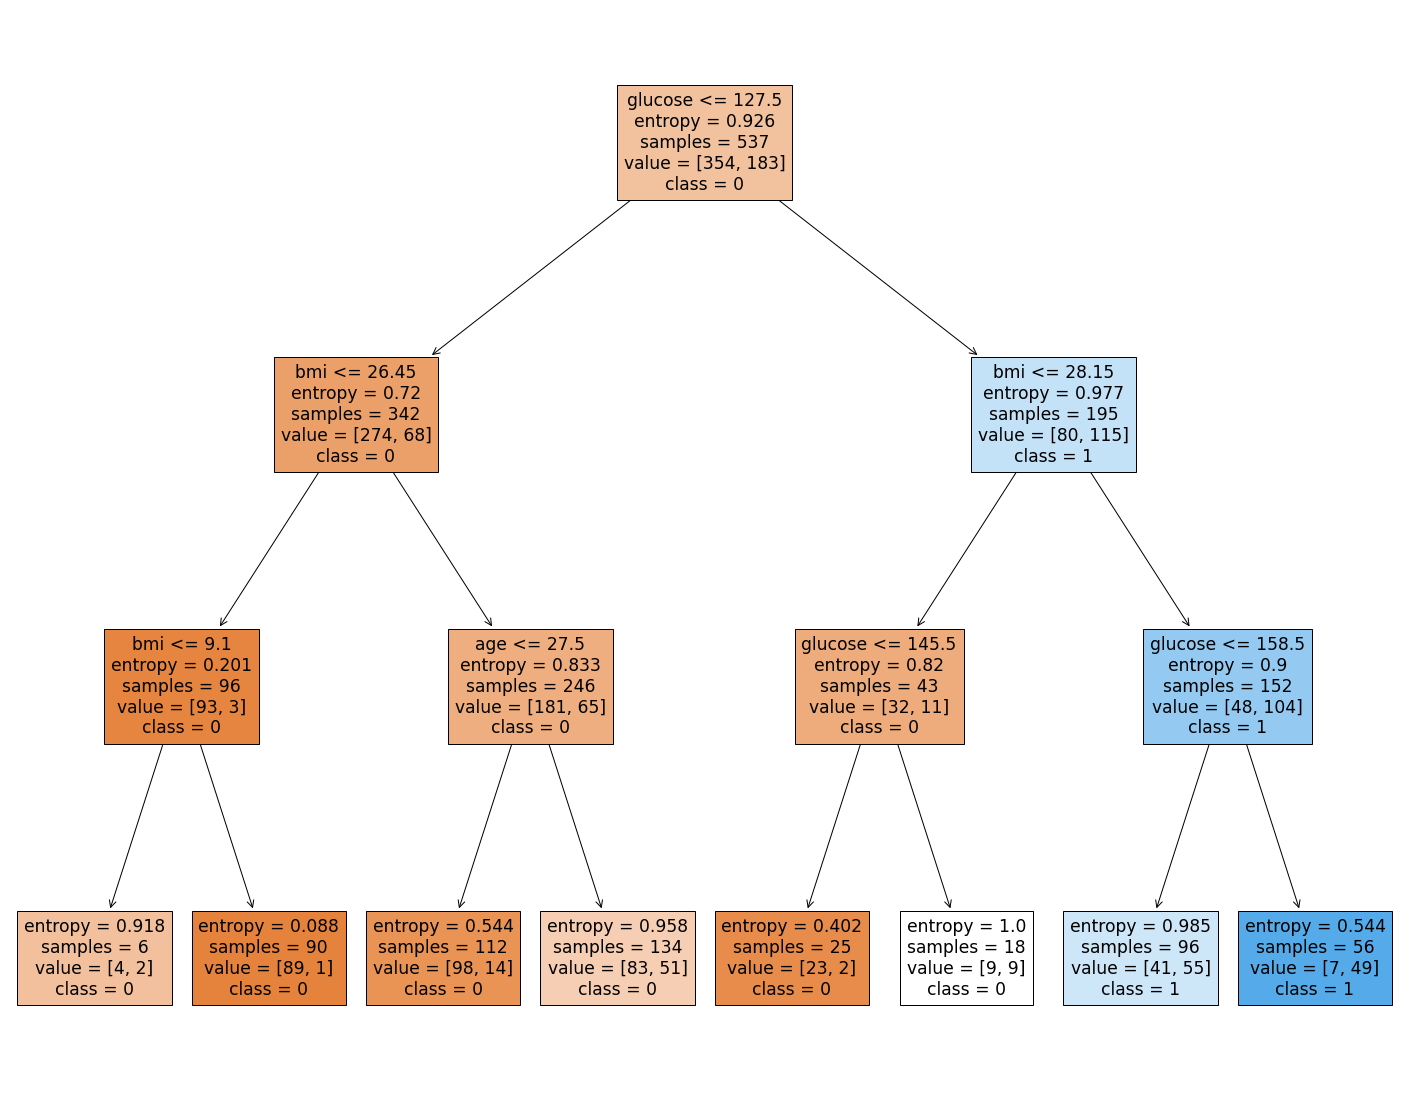

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

In [72]:
#print(X_test)
#print(y_test.tail())

In [112]:
#Giả sử sau khi tùy chỉnh Model ta có một model với độ chính xác chấp nhận được.
#Lưu model đã xây dựng thành công để thực hiện dự đoán
import pickle
filename = 'D:\Documents\MachineLearning\ML_Pima.sav'
pickle.dump(clf, open(filename, 'wb'))
print('Đã lưu thành công!')

Đã lưu thành công!


## Case 1
**Giả sử có một bệnh nhân với các chỉ số như sau:
- pregnant (số lần mang thai)           : 10
- insulin (chỉ số insulin trong máu)    : 0  
- bmi (Body mass Index)                 : 38.0   
- age (tuổi)                            : 34      
- glucose (lượng đường trong máu)       : 168  
- bp (Diastolic blood pressure)         : 74    
- pedigree (Tiền sử bệnh TĐ ở ng thân)  : 0.537

In [113]:
import pickle
filemodel = 'D:\Documents\MachineLearning\ML_Pima.sav'
clf = pickle.load(open(filemodel, 'rb'))

In [114]:
import numpy as np
patient1 =np.array([(10, 0, 38.0, 34, 168, 74, 0.537)])
patient1

array([[ 10.   ,   0.   ,  38.   ,  34.   , 168.   ,  74.   ,   0.537]])

In [115]:
patient1_predict = clf.predict(patient1)
if (patient1_predict==0):
    print("Bệnh nhân không mắc bệnh tiểu đường.")
else:
    print("Bệnh nhân mắc bệnh tiểu đường!")

Bệnh nhân mắc bệnh tiểu đường!


Case 2
**Giả sử có một bệnh nhân với các chỉ số như sau:

- pregnant (số lần mang thai) : 3
- insulin (chỉ số insulin trong máu) : 7
- bmi (Body mass Index) : 20
- age (tuổi) : 35
- glucose (lượng đường trong máu) : 110
- bp (Diastolic blood pressure) : 70
- pedigree (Tiền sử bệnh TĐ ở ng thân) : 0.2

In [58]:
import numpy as np
patient2 =np.array([(3, 7, 20, 35, 110, 70, 0.2)])
patient2

array([[  3. ,   7. ,  20. ,  35. , 110. ,  70. ,   0.2]])

In [59]:
patient2_predict = clf.predict(patient2)
if (patient2_predict==0):
    print("Bệnh nhân không mắc bệnh tiểu đường.")
else:
    print("Bệnh nhân mắc bệnh tiểu đường!")

Bệnh nhân không mắc bệnh tiểu đường.
